In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

## Scenario 1

#### Fawn is a private investigator. She has taken a job for an insurance company. The insurance company has been paying out large amounts of money for workman’s comp claims, and they believe some of those claims are fraudulent. The insurance company wants Fawn and her associates to run surveillance to determine if the rate of fraud is higher than what the industry normally reports. Specifically, they want to know if the incidence of fraud among claimants is more than 16%.

They provide Fawn with a random sample of 94 claimants who have been diagnosed as unable to perform any physical labor beyond light housekeeping activities. They have asked Fawn to observe the sample, and report back to them how many of the claimants are obviously doing things that are much more strenuous than light housekeeping, such as strenuous yard work, weightlifting at the gym or other strenuous sporting activities, etc.

Fawn and her team spend about 8 weeks completing their observations, and report back to the insurance company that 28 of the 94 claimants are not nearly as “disabled” as their diagnosis suggests. The insurance company wants to test the data.

Complete a report for grading. The only data you need is to know that 28 of the 94 claimants are not nearly as “disabled” as their diagnosis suggests, and the hypothetical level of fraud is 16%.

In [3]:
t, p = proportions_ztest(28, 94, 0.16)
t, p

(2.9229268377264077, 0.0034675798365736213)

## Scenario 2

#### Medical researchers are trying to understand if four topical antiseptics are being used in the same ratio at three different clinics in town. They have access to medical records over the past 3 years, and have recorded each treatment where a topical antiseptic was used.

Using a tally sheet, they have determined how many times each antiseptic was used in each of the three clinics, and they want to compare the antiseptic usage across the three clinics.

In [4]:
## data
antiseptics = pd.read_csv ('/Users/patriciaflores/Downloads/antiseptics.csv')

In [6]:
antiseptics.head()

,Clinic,Antiseptic Type,Number of applications
0,1,A,22
1,1,B,71
2,1,C,8
3,1,D,49
4,2,A,38


In [8]:
antiseptics.rename(columns={'Antiseptic Type ': "AT", "Number of applications": "Count"}, inplace=True)
antiseptics_expanded = antiseptics.copy()

In [9]:
antiseptics_pivot = pd.pivot_table(antiseptics,index='AT',columns='Clinic',values="Count")
antiseptics_pivot

Clinic,1,2,3
AT,,,
A,22,38,84
B,71,112,298
C,8,14,37
D,49,69,182


In [11]:
antiseptics_crosstab = pd.crosstab(antiseptics_expanded['Clinic'], antiseptics_expanded['AT']).transpose()
antiseptics_crosstab

Clinic,1,2,3
AT,,,
A,22,38,84
B,71,112,298
C,8,14,37
D,49,69,182


In [12]:
stats.chi2_contingency(antiseptics_crosstab)

(1.225920250023835,
 0.9755850789571424,
 6,
 array([[ 21.95121951,  34.09756098,  87.95121951],
        [ 73.32317073, 113.8953252 , 293.78150407],
        [  8.99390244,  13.97052846,  36.03556911],
        [ 45.73170732,  71.03658537, 183.23170732]]))

In [13]:
stats.chi2_contingency(antiseptics_pivot)

(1.225920250023835,
 0.9755850789571424,
 6,
 array([[ 21.95121951,  34.09756098,  87.95121951],
        [ 73.32317073, 113.8953252 , 293.78150407],
        [  8.99390244,  13.97052846,  36.03556911],
        [ 45.73170732,  71.03658537, 183.23170732]]))

## Scenario 3

#### A financial institution is interested in the savings practices of different demographic groups. They have demographic data for all of their account holders, and have used those criteria to split their customers up into 4 groups.

They are going to use the results to do some targeted marketing. In order to determine savings practices, they are going to use the average savings account balance over the past 3 months for their account holders. In other words, they will have one number (average account balance) for each account.

Each demographic group has between 40 and 60 accounts they will look at.

In [14]:
## data
savings = pd.read_csv ('/Users/patriciaflores/Downloads/savings.csv')

In [15]:
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [16]:
savings.head()

,Group A,Group B,Group C,Group D
0,21383.06,17077.54,13636.38,14582.73
1,19729.92,17258.06,5156.36,12880.28
2,24071.53,20652.91,4446.92,16412.72
3,19056.28,20845.06,4892.59,14020.00
4,19147.18,22296.64,14099.38,16467.70


In [17]:
savings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Group A  51 non-null     float64
 1   Group B  47 non-null     float64
 2   Group C  55 non-null     float64
 3   Group D  58 non-null     float64
dtypes: float64(4)
memory usage: 1.9 KB


In [18]:
savings_expanded=pd.melt(savings,var_name='Group', value_name='$')

In [19]:
savings_expanded = savings_expanded.replace(savings.columns, [0,1,2,3])

In [20]:
savings_expanded.head()

,Group,$
0,0,21383.06
1,0,19729.92
2,0,24071.53
3,0,19056.28
4,0,19147.18


/usr/local/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

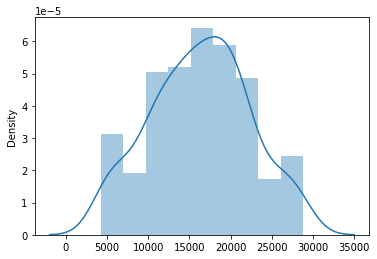

In [21]:
sns.distplot(savings.values[~np.isnan(savings.values)])

In [22]:
scipy.stats.bartlett(savings_expanded['$'], savings_expanded['Group'])

BartlettResult(statistic=3639.1753663764925, pvalue=0.0)

In [24]:
scipy.stats.fligner(savings_expanded['$'], savings_expanded['Group'])

FlignerResult(statistic=292.8661128532466, pvalue=1.1805018303420083e-65)

In [27]:
data = [savings[col].dropna() for col in savings]

In [28]:
stats.f_oneway(*data)

F_onewayResult(statistic=203.25514198903812, pvalue=1.9933595578005075e-61)

## Scenario 4

#### The local school board conducted a poll to gauge public sentiment about a school bond. They asked respondents if they favored or opposed a bond in the upcoming election. The respondents were asked some demographic questions, too.

Complete a report for grading. The counts for the different groups are as follows:

With school age children and favorable - 374
With school age children and unfavorable - 129
Without school age children and favorable - 171
Without school age children and unfavorable - 74
Use these data to complete your analysis, and use alpha = 0.05.

In [ ]:
t, p = proportions_ztest([374, 171], [374+129, 180+174])
t, p